In [1]:
from obspy.clients.fdsn import Client
from obspy import UTCDateTime, read
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from obspy.io.quakeml.core import Unpickler
import pandas as pd
import os

client = Client("IRIS")

In [2]:
# Paths

mseeds_path = '/data/sdybing/olderdata/mseeds/'
array_path = '/data/sdybing/olderdata/arrays/'

# Event catalog

new_catalog = np.genfromtxt('/home/sdybing/neic-mlaapde/2000-2013_catalog.csv', delimiter = ',', dtype = 'str', skip_header = 1) # M7.5+ 01/01/2000 - 07/31/2013
event_ids = new_catalog[:,8]

# Other things

resample_hz = 20
nsamp_historic = 13449
n_channels = 3
window_len = 120
historic_test_waves = np.zeros(shape = (nsamp_historic, window_len * resample_hz, n_channels))

In [3]:
new_catalog

array([['2000-03-28T11:00:22.510Z', '22.338', '143.73', '126.5', '7.6',
        'mwc', '', 'us', 'usp0009qb4', '2022-04-29T18:35:42.761Z', 'us',
        'hrv'],
       ['2000-05-04T04:21:16.210Z', '-1.105', '123.573', '26', '7.6',
        'mwc', '', 'us', 'usp0009sbh', '2022-04-29T19:16:21.382Z', 'us',
        'hrv'],
       ['2000-06-04T16:28:26.170Z', '-4.721', '102.087', '33', '7.9',
        'mwc', '379', 'us', 'usp0009txv', '2022-04-29T18:39:33.008Z',
        'us', 'hrv'],
       ['2000-06-18T14:44:13.310Z', '-13.802', '97.453', '10', '7.9',
        'mwc', '405', 'us', 'usp0009ut0', '2022-04-29T18:42:02.193Z',
        'us', 'hrv'],
       ['2000-11-16T04:54:56.740Z', '-3.98', '152.169', '33', '8', 'mwc',
        '254', 'us', 'usp000a3qq', '2022-04-29T19:26:13.204Z', 'us',
        'hrv'],
       ['2000-11-16T07:42:16.930Z', '-5.233', '153.102', '30', '7.8',
        'mwc', '294', 'us', 'usp000a3sp', '2022-04-29T19:16:32.829Z',
        'us', 'hrv'],
       ['2000-11-17T21:01:56.490Z',

In [3]:
a = 0
historic_test_mags = []
historic_test_magtypes = []
historic_test_eventids = []
    
for idx in range(len(event_ids)):
    
    event_id = new_catalog[idx,8]
#     print(event_id)
    mag = float(new_catalog[idx,4])
#     print(mag)
    mag_type = new_catalog[idx,5]
#     print(mag_type)
    
    event_path = mseeds_path + event_id
    print(event_path)
    
    stas = []
    in_folder = os.listdir(event_path)
    for i in in_folder:
        if os.path.isdir(event_path + '/' + i):
            stas.append(i)
    
    for sta in stas:
        
        sta_path = event_path + '/' + sta

        try:
            E = read(sta_path + '/' + 'BHE.mseed')
            E.resample(resample_hz)
            E.detrend('demean')
            E.detrend('linear')
            historic_test_waves[a, :, 0] = E[0].data
        except:
            historic_test_waves[a, :, 0] = 0
        try:
            N = read(sta_path + '/' + 'BHN.mseed')
            N.resample(resample_hz)
            N.detrend('demean')
            N.detrend('linear')
            historic_test_waves[a, :, 1] = N[0].data
                #print(N[0].stats.sampling_rate)
        except:
            historic_test_waves[a, :, 1] = 0
        try:
            Z = read(sta_path + '/' + 'BHZ.mseed')
            Z.resample(resample_hz)
            Z.detrend('demean')
            Z.detrend('linear')
            historic_test_waves[a, :, 2] = Z[0].data
#             print(Z[0].stats.sampling_rate)
        except:
            historic_test_waves[a, :, 2] = 0

#         print(a)
        
#         wmax = np.max(abs(historic_test_waves[a]))
# #         print(wmax)
#         if wmax == 0:
#             print(a)

        historic_test_mags.append(mag)
        historic_test_magtypes.append(mag_type)
        historic_test_eventids.append(event_id)

        a += 1


/data/sdybing/olderdata/mseeds/usp0009qb4
/data/sdybing/olderdata/mseeds/usp0009sbh
/data/sdybing/olderdata/mseeds/usp0009txv
/data/sdybing/olderdata/mseeds/usp0009ut0
/data/sdybing/olderdata/mseeds/usp000a3qq
/data/sdybing/olderdata/mseeds/usp000a3sp
/data/sdybing/olderdata/mseeds/usp000a45f
/data/sdybing/olderdata/mseeds/usp000a70h
/data/sdybing/olderdata/mseeds/usp000a7m5
/data/sdybing/olderdata/mseeds/usp000a8ds
/data/sdybing/olderdata/mseeds/official20010623203314130_33
/data/sdybing/olderdata/mseeds/usp000aj40
/data/sdybing/olderdata/mseeds/usp000ar78
/data/sdybing/olderdata/mseeds/usp000asvm
/data/sdybing/olderdata/mseeds/usp000azqw
/data/sdybing/olderdata/mseeds/usp000ba6g
/data/sdybing/olderdata/mseeds/usp000ba6m
/data/sdybing/olderdata/mseeds/usp000bbpf
/data/sdybing/olderdata/mseeds/usp000be54
/data/sdybing/olderdata/mseeds/ak002e435qpj
/data/sdybing/olderdata/mseeds/usp000bnyr
/data/sdybing/olderdata/mseeds/usp000c2ka
/data/sdybing/olderdata/mseeds/usp000c41f
/data/sdybing/

In [4]:
print(a)

13449


In [5]:
print(historic_test_waves.shape)
print(len(historic_test_mags))
print(len(historic_test_magtypes))
print(len(historic_test_eventids))

(13449, 2400, 3)
13449
13449
13449


In [6]:
historic_test_mags = np.array(historic_test_mags)
historic_test_mags = np.float32(historic_test_mags)
historic_test_magtypes = np.array(historic_test_magtypes)

print(historic_test_mags.shape)
print(historic_test_mags.dtype)
print(historic_test_magtypes.shape)
print(historic_test_magtypes.dtype)

(13449,)
float32
(13449,)
<U3


In [7]:
norm_historic_test_waves = np.zeros(shape = (nsamp_historic, window_len * resample_hz, n_channels))

for idx in range(len(historic_test_waves)):
    
    #print(idx)
    wave = historic_test_waves[idx]
    
#     plt.figure(facecolor = 'white')
#     plt.plot(wave[:,0])
#     plt.plot(wave[:,1])
#     plt.plot(wave[:,2])
#     plt.show()
#     plt.close()
    
    norm_historic_test_waves[idx,:,0] = wave[:,0] / np.max(abs(wave))
    norm_historic_test_waves[idx,:,1] = wave[:,1] / np.max(abs(wave))
    norm_historic_test_waves[idx,:,2] = wave[:,2] / np.max(abs(wave))
    
#     plt.figure(facecolor = 'white')
#     plt.plot(norm_historic_test_waves[idx,:,0])
#     plt.plot(norm_historic_test_waves[idx,:,1])
#     plt.plot(norm_historic_test_waves[idx,:,2])
#     plt.show()
#     plt.close()

# Divide error: 463

/home/sdybing/miniconda3/envs/mlaapde/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in true_divide
  from ipykernel import kernelapp as app
/home/sdybing/miniconda3/envs/mlaapde/lib/python3.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in true_divide
  app.launch_new_instance()
/home/sdybing/miniconda3/envs/mlaapde/lib/python3.7/site-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in true_divide


5352


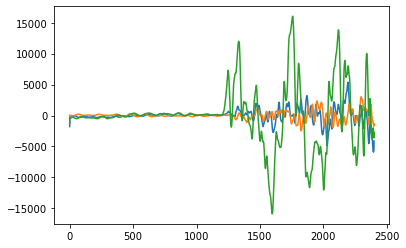

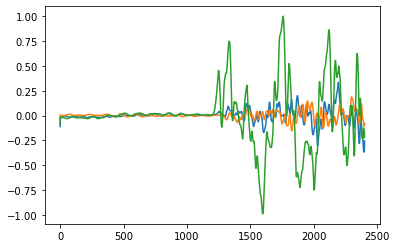

In [15]:
i = np.random.randint(0, nsamp_historic)
#i = 572
print(i)

plt.figure(facecolor = 'white')
plt.plot(historic_test_waves[i,:,0])
plt.plot(historic_test_waves[i,:,1])
plt.plot(historic_test_waves[i,:,2])
plt.show()
plt.close()

plt.figure(facecolor = 'white')
plt.plot(norm_historic_test_waves[i,:,0])
plt.plot(norm_historic_test_waves[i,:,1])
plt.plot(norm_historic_test_waves[i,:,2])
plt.show()
plt.close()

In [16]:
norm_historic_test_waves.dtype

dtype('float64')

In [10]:
norm_historic_test_waves.shape

(13449, 2400, 3)

In [11]:
norm_historic_test_waves_float32 = np.float32(norm_historic_test_waves)

In [12]:
norm_historic_test_waves_float32.dtype

dtype('float32')

In [13]:
np.save(array_path + 'historic_test_waves.npy', norm_historic_test_waves_float32)
np.save(array_path + 'historic_test_mags.npy', historic_test_mags)
np.save(array_path + 'historic_test_magtypes.npy', historic_test_magtypes)
np.save(array_path + 'historic_test_eventids.npy', historic_test_eventids)